In [250]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re


In [251]:
import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
data_dir = 'data/'

In [253]:
macbeth_file = data_dir + 'macbeth.txt'

In [254]:
caesar_file = data_dir + 'julius_caesar.txt'

In [255]:
stopword_file = data_dir + 'long_stopwords.txt'

In [256]:
stop_words = []

with open(stopword_file,'r') as inpFile:
    lines = inpFile.readlines()
    stop_words_temp = map(lambda x : re.sub('\n','',x),lines)
    stop_words = map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp)


In [257]:
stop_words

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [258]:
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
    if word not in stop_words:
        return word
    else:
        return ''

In [259]:
clean("king's")

'kings'

In [260]:
clean("they'll")

''

In [261]:
line_count = 0
sentences = []

with open(macbeth_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = filter(lambda x:True if len(x) > 0 else False, words)
            sentences.append(words)
            
with open(caesar_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = filter(lambda x:True if len(x) > 0 else False, words)
            sentences.append(words)

In [262]:
sentences

[['1606'],
 [],
 ['tragedy', 'macbeth'],
 [],
 [],
 ['william', 'shakespeare'],
 [],
 [],
 [],
 ['dramatis', 'personae'],
 [],
 ['duncan', 'king', 'scotland'],
 ['macbeth', 'thane', 'glamis', 'cawdor', 'general', 'kings'],
 ['army'],
 ['lady', 'macbeth', 'wife'],
 ['macduff', 'thane', 'fife', 'nobleman', 'scotland'],
 ['lady', 'macduff', 'wife'],
 ['malcolm', 'elder', 'son', 'duncan'],
 ['donalbain', 'younger', 'son', 'duncan'],
 ['banquo', 'thane', 'lochaber', 'general', 'kings', 'army'],
 ['fleance', 'son'],
 ['lennox', 'nobleman', 'scotland'],
 ['ross', 'nobleman', 'scotland'],
 ['menteith', 'nobleman', 'scotland'],
 ['angus', 'nobleman', 'scotland'],
 ['caithness', 'nobleman', 'scotland'],
 ['siward', 'earl', 'northumberland', 'general', 'english', 'forces'],
 ['young', 'siward', 'son'],
 ['seyton', 'attendant', 'macbeth'],
 ['hecate', 'queen', 'witches'],
 ['three', 'witches'],
 ['boy', 'son', 'macduff'],
 ['gentlewoman', 'attending', 'lady', 'macbeth'],
 ['english', 'doctor'],
 [

In [273]:
model = Word2Vec(sentences, window=5, size=500, workers=4, min_count=5)

In [274]:
model.vocab

{'1': <gensim.models.word2vec.Vocab at 0x7f48f4c65c10>,
 '19901993': <gensim.models.word2vec.Vocab at 0x7f48f40341d0>,
 '2': <gensim.models.word2vec.Vocab at 0x7f48f68e4e10>,
 'afraid': <gensim.models.word2vec.Vocab at 0x7f48f72ddf90>,
 'age': <gensim.models.word2vec.Vocab at 0x7f48f7444490>,
 'air': <gensim.models.word2vec.Vocab at 0x7f48f4c4e250>,
 'alarum': <gensim.models.word2vec.Vocab at 0x7f48f7444190>,
 'alarums': <gensim.models.word2vec.Vocab at 0x7f48f4c7c310>,
 'alas': <gensim.models.word2vec.Vocab at 0x7f48f68e4690>,
 'alive': <gensim.models.word2vec.Vocab at 0x7f48ebfb0fd0>,
 'ambition': <gensim.models.word2vec.Vocab at 0x7f48f4be4a10>,
 'ambitious': <gensim.models.word2vec.Vocab at 0x7f48f40362d0>,
 'amen': <gensim.models.word2vec.Vocab at 0x7f48f4be7ad0>,
 'angry': <gensim.models.word2vec.Vocab at 0x7f48f4c7c3d0>,
 'angus': <gensim.models.word2vec.Vocab at 0x7f48f68dbd90>,
 'anon': <gensim.models.word2vec.Vocab at 0x7f48f4d5c1d0>,
 'answer': <gensim.models.word2vec.Vocab 

In [275]:
#df = pd.DataFrame(columns = ['token', 'x', 'y'])
labels = []
tokens = []

for word in model.vocab:
    tokens.append(model[word])
    labels.append(word)
    


In [276]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [277]:
new_values = tsne_model.fit_transform(tokens)

In [278]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

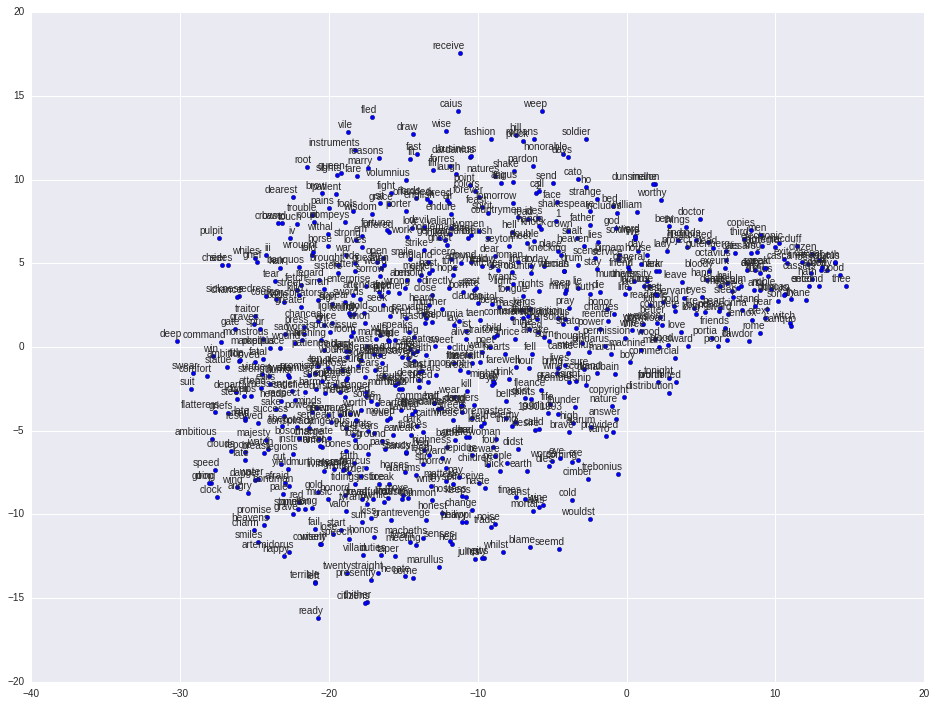

In [279]:
plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [293]:
model.most_similar(positive=['caesar','duncan'],negative=['scotland'])

[('brutus', 0.6771138906478882),
 ('macbeth', 0.6508365273475647),
 ('lord', 0.6454422473907471),
 ('thee', 0.6306240558624268),
 ('antony', 0.6270352602005005),
 ('will', 0.6232081651687622),
 ('good', 0.6222116351127625),
 ('enter', 0.6218792796134949),
 ('cassius', 0.621610164642334),
 ('ross', 0.6145917773246765)]

In [281]:
model.most_similar(positive=['caesar','duncan'],negative=['macbeth'])

[('brutus', 0.6306704878807068),
 ('lord', 0.622245728969574),
 ('thee', 0.6084285378456116),
 ('ross', 0.5962476134300232),
 ('antony', 0.59565669298172),
 ('good', 0.5951849222183228),
 ('enter', 0.5913326740264893),
 ('will', 0.5911813974380493),
 ('witch', 0.587189793586731),
 ('cassius', 0.5866247415542603)]

In [282]:
model.most_similar(positive=['caesar','macbeth'],negative=['banquo'])

[('brutus', 0.7180973291397095),
 ('lord', 0.6981340646743774),
 ('good', 0.6964137554168701),
 ('thee', 0.6945415735244751),
 ('cassius', 0.6936444044113159),
 ('will', 0.681480884552002),
 ('second', 0.6800339818000793),
 ('ross', 0.6749200224876404),
 ('citizen', 0.6720598936080933),
 ('enter', 0.6648241281509399)]

In [292]:
model.most_similar(positive=['rome','scotland'],negative=['banquo'])

[('good', 0.3547469675540924),
 ('eyes', 0.3528827130794525),
 ('thee', 0.3505154848098755),
 ('caesar', 0.34980279207229614),
 ('brutus', 0.34714704751968384),
 ('ross', 0.346886545419693),
 ('lennox', 0.3452118933200836),
 ('enter', 0.34333932399749756),
 ('cassius', 0.3422073721885681),
 ('will', 0.3368792235851288)]

In [299]:
model.doesnt_match("duncan macbeth scotland banquo".split())

'scotland'

In [307]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('good', 0.3818654716014862),
 ('lord', 0.3810933232307434),
 ('time', 0.3525843322277069),
 ('will', 0.35244470834732056),
 ('citizen', 0.3510192930698395),
 ('brutus', 0.3495525121688843),
 ('gutenberg', 0.34804391860961914),
 ('antony', 0.3475690484046936),
 ('thee', 0.3443056344985962),
 ('macduff', 0.34045231342315674)]